# Investigate Patients‘ Apperance Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### Data Gathering and Assessing

First we will read in the dataset and take a look into the first few lines. Then we'll look into the dataset to check quality and structure of the data. 

In [29]:
# set up packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

* Read in CSV file

In [30]:
# Load data and print out a few lines.
df = pd.read_csv(r'noshowappointments-kagglev2-may-2016.csv')
#pd.set_option('display.float_format', lambda x: '%.f' % x)

In [31]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [32]:
#check data propeties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [33]:
#explore share, variable names, and missing values
print('Datast contains {} row and {} variables.'.format(df.shape[0], df.shape[1]))
print('\nDatast contains variables: ', ', '.join(df.columns.values))
print('\nNumeric variables: ', ', '.join(df.select_dtypes(include=['float', 'int']).columns.values))
print('\nCategorical variables: ', ', '.join(df.select_dtypes(include=['object']).columns.values))

Datast contains 110527 row and 14 variables.

Datast contains variables:  PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show

Numeric variables:  PatientId, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received

Categorical variables:  Gender, ScheduledDay, AppointmentDay, Neighbourhood, No-show


* Completeness

In [34]:
#
print('\nNumber of missing values:\n', df.isnull().sum())


Number of missing values:
 PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


There is no missing data within each variable, which is pretty good. Next we'll check the data type of each variable. 

* Validity and Accuracy

In [35]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [36]:
df_cat = df.select_dtypes(include='object')
df_cat.describe()

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [37]:
#check categories of character variable
print(df['Gender'].value_counts(dropna=False), '\n');

print(df['Neighbourhood'].value_counts(), '\n');


Gender
F    71840
M    38687
Name: count, dtype: int64 

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64 



In [38]:
#check encoded values
print(df['Scholarship'].value_counts(), '\n');

print(df['Hipertension'].value_counts(), '\n');

print(df['Diabetes'].value_counts(), '\n');

print(df['Alcoholism'].value_counts(), '\n');


Scholarship
0    99666
1    10861
Name: count, dtype: int64 

Hipertension
0    88726
1    21801
Name: count, dtype: int64 

Diabetes
0    102584
1      7943
Name: count, dtype: int64 

Alcoholism
0    107167
1      3360
Name: count, dtype: int64 



In [39]:

print(df['Handcap'].value_counts(), '\n');

print(df['SMS_received'].value_counts(), '\n');

print(df['No-show'].value_counts(), '\n');

Handcap
0    108286
1      2042
2       183
3        13
4         3
Name: count, dtype: int64 

SMS_received
0    75045
1    35482
Name: count, dtype: int64 

No-show
No     88208
Yes    22319
Name: count, dtype: int64 



In [40]:
#check numeric variables
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The minimum of age is -1, which is not reasonable. Let's take a look into it. Will delete this line in data cleaning. 

In [41]:
df[df['Age']==-1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


* Uniqueness

In [42]:
df.duplicated().sum()

0

No duplicated record in the dataset. 


## Data Cleaning


 

First we'll copy the dataset so our updates won't change the original one. Then we'll create numeric result variable `Show`.

In [43]:
#copy the original dataset to appoint
appoint = df.copy()

### Deal with date and time
*  Convert `ScheduledDay` and `AppointmentDay` as datetime type. 
  
* Split date and time from varaibles `ScheduledDay` and `AppointmentDay`.


In [44]:
def split_datetime(df, datetime_col):
    # Convert the column to datetime
    df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')

    # Create new date and time columns
    df[datetime_col + '_Date'] = df[datetime_col].dt.date
    df[datetime_col + '_Time'] = df[datetime_col].dt.time

    # Convert the new columns back to datetime
    df[datetime_col + '_Date'] = pd.to_datetime(df[datetime_col + '_Date'])
    df[datetime_col + '_Time_seconds'] = df[datetime_col + '_Time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)


    return df

In [45]:
appoint = split_datetime(appoint, 'ScheduledDay')
appoint = split_datetime(appoint, 'AppointmentDay')

In [46]:
appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,ScheduledDay_Time_seconds,AppointmentDay_Date,AppointmentDay_Time,AppointmentDay_Time_seconds
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,18:38:08,67088,2016-04-29,00:00:00,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,16:08:27,58107,2016-04-29,00:00:00,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,16:19:04,58744,2016-04-29,00:00:00,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,17:29:31,62971,2016-04-29,00:00:00,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,16:07:23,58043,2016-04-29,00:00:00,0



* Create new variable to show patients' waiting time and clean it

In [47]:
# Create a new variable to show the waiting time between scheduled day and appointment day
appoint['WaitDay'] = (appoint['AppointmentDay'] - appoint['ScheduledDay'] ).dt.days +1

appoint.sort_values(by='WaitDay').head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,ScheduledDay_Time_seconds,AppointmentDay_Date,AppointmentDay_Time,AppointmentDay_Time_seconds,WaitDay
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,...,0,0,Yes,2016-05-11,13:49:20,49760,2016-05-05,00:00:00,0,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,...,0,0,Yes,2016-05-04,06:50:57,24657,2016-05-03,00:00:00,0,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,...,0,0,Yes,2016-05-05,13:43:58,49438,2016-05-04,00:00:00,0,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,...,1,0,Yes,2016-05-18,14:50:41,53441,2016-05-17,00:00:00,0,-1
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,...,1,0,Yes,2016-05-10,10:51:53,39113,2016-05-09,00:00:00,0,-1


Negative waiting time doesn't make sence. We'll reset `WaitDay` as missing for negative ones

In [48]:
#set the waiting time to missing if WaitTime is negative
Na = np.nan
appoint.loc[appoint['WaitDay'] < 0, 'WaitDay'] = Na
#missing data at the end
appoint.sort_values(by='WaitDay').tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,ScheduledDay_Time_seconds,AppointmentDay_Date,AppointmentDay_Time,AppointmentDay_Time_seconds,WaitDay
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,...,1,0,Yes,2016-05-10,10:51:53,39113,2016-05-09,00:00:00,0,NaN
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,...,1,0,Yes,2016-05-18,14:50:41,53441,2016-05-17,00:00:00,0,NaN
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,...,0,0,Yes,2016-05-05,13:43:58,49438,2016-05-04,00:00:00,0,NaN
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,...,0,0,Yes,2016-05-11,13:49:20,49760,2016-05-05,00:00:00,0,NaN
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,...,0,0,Yes,2016-05-04,06:50:57,24657,2016-05-03,00:00:00,0,NaN


### Deal with data accuracy

* Delete the line with `age=-1`

In [49]:
#delete rows with negative age
appoint = appoint.loc[appoint['Age']>=0]
#check if the rows are deleted
appoint.loc[appoint['Age']<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Handcap,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,ScheduledDay_Time_seconds,AppointmentDay_Date,AppointmentDay_Time,AppointmentDay_Time_seconds,WaitDay


### Write the cleaned dataset out to an excel file

In [50]:
# Convert datetime columns to timezone unaware
appoint['ScheduledDay'] = appoint['ScheduledDay'].dt.tz_localize(None)
appoint['AppointmentDay'] = appoint['AppointmentDay'].dt.tz_localize(None)

# Write the final dataframe to an excel file
appoint.to_excel('showup.xlsx', sheet_name='Data')

<a id='eda'></a>
## Exploratory Data Analysis

### Correlation

To explore factors' influence, Let's start by looking at the correlations between the apperance variable and the other variables to see if there are any strong relationships.

In [51]:
#Creating a dictionary to create new numeric column Show
show = {
    'No': 1,
    'Yes': 0
}

#Numeric result for Show
appoint['Show'] = appoint['No-show'].map(show)
appoint.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,SMS_received,No-show,ScheduledDay_Date,ScheduledDay_Time,ScheduledDay_Time_seconds,AppointmentDay_Date,AppointmentDay_Time,AppointmentDay_Time_seconds,WaitDay,Show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,No,2016-04-29,18:38:08,67088,2016-04-29,00:00:00,0,0.0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,No,2016-04-29,16:08:27,58107,2016-04-29,00:00:00,0,0.0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,No,2016-04-29,16:19:04,58744,2016-04-29,00:00:00,0,0.0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,No,2016-04-29,17:29:31,62971,2016-04-29,00:00:00,0,0.0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,No,2016-04-29,16:07:23,58043,2016-04-29,00:00:00,0,0.0,1


In [58]:
# Drop the 'PatientId' and 'AppointmentID' as they are unique identifiers
# Drop 'No-show' as we have created a new column 'Show'
# Drop 'ScheduledDay' and 'AppointmentDay' as we have 'ScheduledDay_Date' and 'AppointmentDay_Date'
# Drop 'ScheduledDay_Time' and 'AppointmentDay_Time' as we have Time_seconds
data_for_corr = appoint.drop(['PatientId', 'AppointmentID', 'No-show', 'ScheduledDay', 'AppointmentDay','ScheduledDay_Time', 'AppointmentDay_Time_seconds','AppointmentDay_Time'], axis=1)

# Convert categorical variables to dummy variables for correlation analysis
#data_for_corr = pd.get_dummies(data_for_corr, drop_first=True)

# Encode categorical variables
label_encoder = LabelEncoder()

data_for_corr['Gender'] = label_encoder.fit_transform(data_for_corr['Gender'])
data_for_corr['Neighbourhood'] = label_encoder.fit_transform(data_for_corr['Neighbourhood'])

data_for_corr.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_Date,ScheduledDay_Time_seconds,AppointmentDay_Date,WaitDay,Show
0,0,62,39,0,1,0,0,0,0,2016-04-29,67088,2016-04-29,0.0,1
1,1,56,39,0,0,0,0,0,0,2016-04-29,58107,2016-04-29,0.0,1
2,0,62,45,0,0,0,0,0,0,2016-04-29,58744,2016-04-29,0.0,1
3,0,8,54,0,0,0,0,0,0,2016-04-29,62971,2016-04-29,0.0,1
4,0,56,39,0,1,1,0,0,0,2016-04-29,58043,2016-04-29,0.0,1


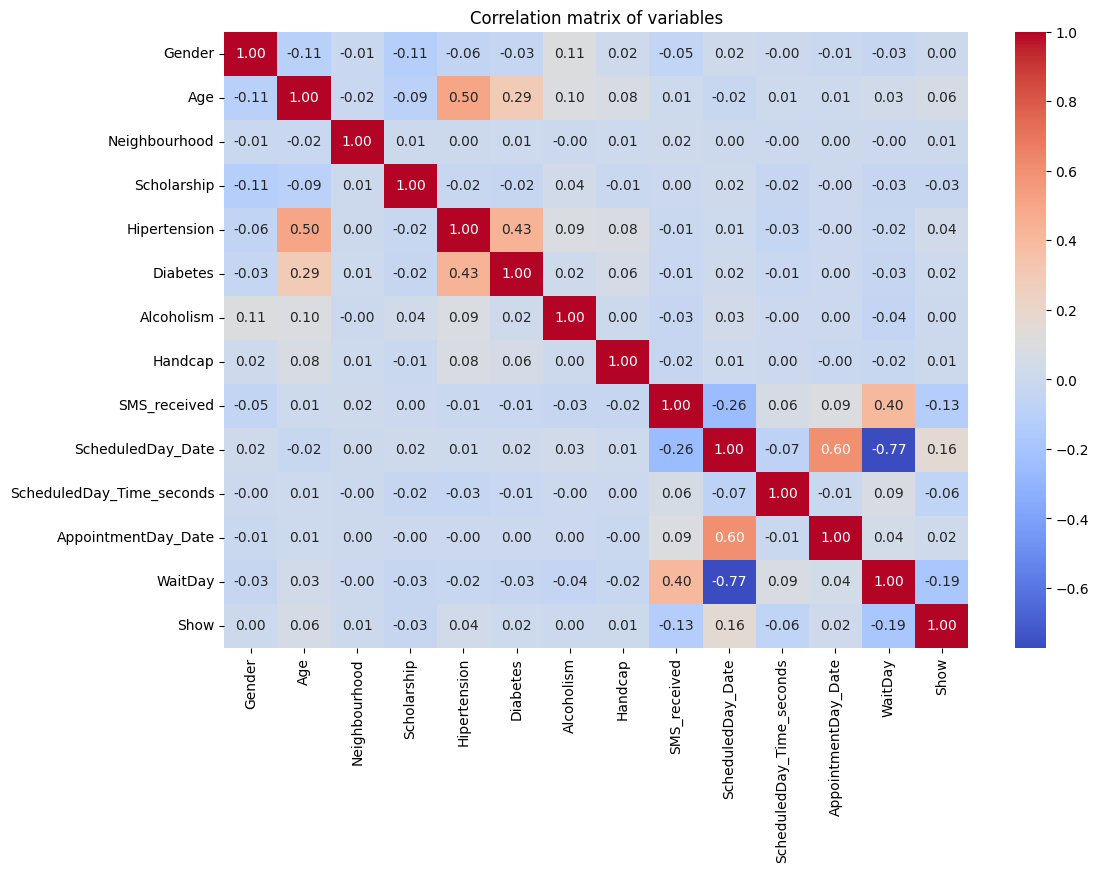

In [59]:

# Calculate the correlation matrix
correlation_matrix = data_for_corr.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix of variables')
plt.show()

The analysis has identified several factors that appear to have a correlation with patient no-shows:

WaitDay (-0.19): A negative correlation here indicates that patients with longer waiting time are more likely to miss their appointments.

ScheduledDay_Date (0.16): A possitive correlation here indicates that patients making the schedule earlier are more likely to miss their appointments, which is the same results as above. 

SMS_received (-0.13): There is a negative correlation, suggesting that patients who received an SMS were more likely to not show up. This is somewhat counterintuitive and might need further investigation to understand the context. Perhaps there are confounding factors.

Age (0.06): A positive correlation here indicates that younger patients are more likely to miss their appointments than older patients.

ScheduledDay_Time_Seconds (-0.06): A negative correlation here indicates that schedules made in the latter time of the day are more likely to be missed.

These correlations are relatively weak, indicating that no single factor has a very strong direct relationship with whether patients miss their appointments. It's important to note that correlation does not imply causation, and there may be other underlying factors that influence these relationships.

* Set categorical Variables


In [ ]:
#function convert columns to category type
def convert_to_category(df, columns):
    for col in columns:
        df[col] = df[col].astype('category')
    return df   

appoint = convert_to_category(appoint, ['Scholarship', 'Gender', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received', 'NO-show'])

appoint.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110526 non-null  float64       
 1   AppointmentID    110526 non-null  int64         
 2   Gender           110526 non-null  category      
 3   ScheduledDay     110526 non-null  datetime64[ns]
 4   AppointmentDay   110526 non-null  datetime64[ns]
 5   Age              110526 non-null  int64         
 6   Neighbourhood    110526 non-null  object        
 7   Scholarship      110526 non-null  category      
 8   Hipertension     110526 non-null  category      
 9   Diabetes         110526 non-null  category      
 10  Alcoholism       110526 non-null  category      
 11  Handcap          110526 non-null  int64         
 12  SMS_received     110526 non-null  category      
 13  No-show          110526 non-null  object        
 14  Show             110526 n

/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_2906/2752323355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')


In [ ]:
#check the categories
appoint.Hipertension.cat.categories

Index([0, 1], dtype='int64')

In [ ]:
#function to rename categories
def rename_categories(df, columns, categories):
    for col in columns:
        df[col] = df[col].cat.rename_categories(categories)
    return df   

appoint = rename_categories(appoint, ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received'], ['N', 'Y'])

appoint.head()

/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_2906/962428392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.rename_categories(categories)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Show,ScheduledDate,ScheduledTime,AppointmentDate,AppointmentTime,WaitDay
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,N,Y,N,N,0,N,No,1,2016-04-29,18:38:08,2016-04-29,00:00:00,0.0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,N,N,N,N,0,N,No,1,2016-04-29,16:08:27,2016-04-29,00:00:00,0.0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,N,N,N,N,0,N,No,1,2016-04-29,16:19:04,2016-04-29,00:00:00,0.0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,N,N,N,N,0,N,No,1,2016-04-29,17:29:31,2016-04-29,00:00:00,0.0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,N,Y,Y,N,0,N,No,1,2016-04-29,16:07:23,2016-04-29,00:00:00,0.0


* No-show distribution

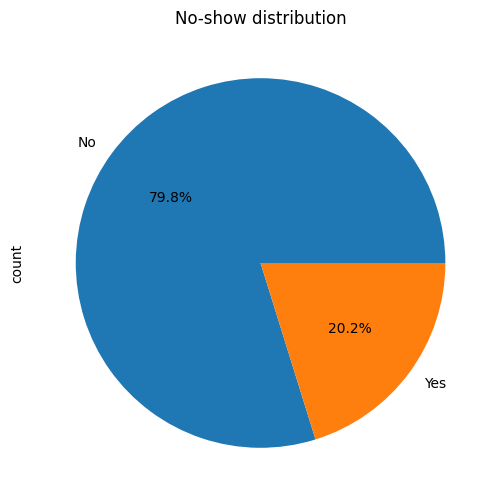

In [ ]:
#plot the distribution of No-show
appoint['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('No-show distribution');

We have less data for appointments which patients missed, whcich is as what we expected.

In [ ]:
#contigency table
tab = pd.crosstab( [appoint['Scholarship'], appoint['Hipertension'], appoint['SMS_received']], appoint['Show'], margins=True)
#check when 'Scholarship'=='N'
tab.loc['N']
#check when 'Scholarship'=='N' and 'Hipertension'=='N'
tab.loc['N', 'N']
#check when 'Scholarship'=='N' and 'Hipertension'=='N' and 'SMS_received'=='N'
tab.loc['N', 'N', 'N']
#check when 'Hipertension'=='N' and 'SMS_received'=='N'
tab.loc[:, 'N', 'N']


/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_2906/2442000791.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  tab.loc['N', 'N']


Show,0,1,All
Scholarship,,,
N,9130,44937,54067
Y,1178,4868,6046


Checking some contingency tables to find if there is any stong differene acroos categories. 

* Any categorical vairables impact patients apperance?

/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_5541/3086765602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_5541/3086765602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_5541/3086765602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_5541/3086765602.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


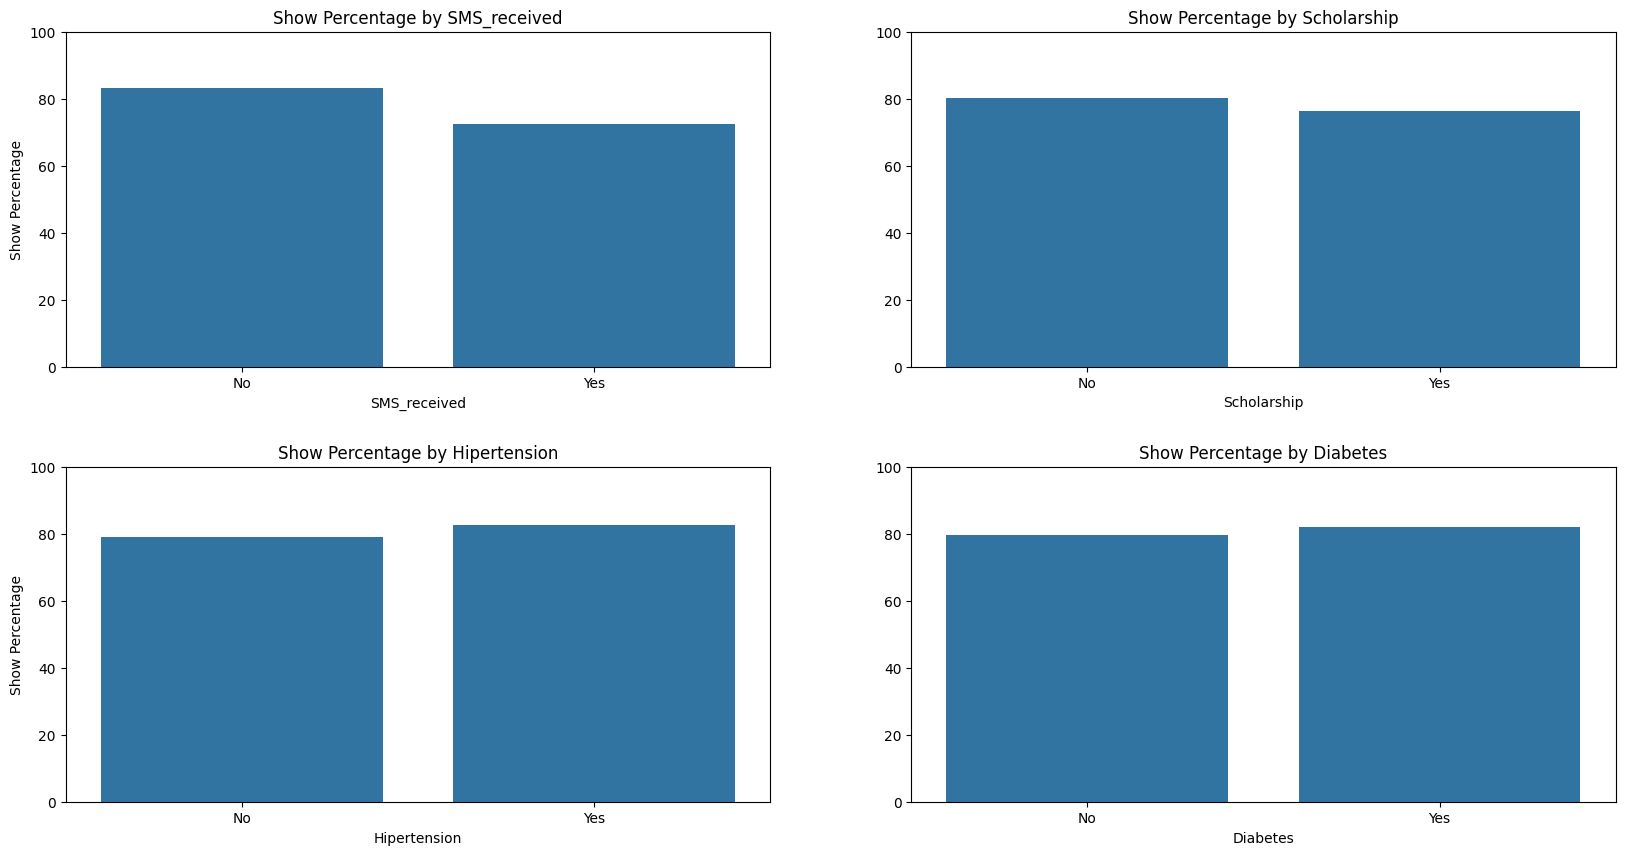

In [70]:
#function to plot variables
def plot_variables(df, variables, outcome_var):
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    # Loop over each variable and each subplot
    for var, ax in zip(variables, axes.flatten()):
        # Create a cross-tabulation of the variable and outcome_var
        data = pd.crosstab(df[var], df[outcome_var])
        # Create the bar plot with 'showpct' calculated directly
        sns.barplot(data=data, x=data.index, y=data[1] / data.sum(axis=1) * 100, ax=ax)
        
        # Set the title, labels, and y-limit
        ax.set_title(f'{outcome_var} Percentage by {var}')
        ax.set_ylabel(f'{outcome_var} Percentage' if ax in [axes[0,0], axes[1,0]] else '')
        ax.set_xlabel(var)
        ax.set_ylim(0, 100)
        ax.set_xticklabels(['No', 'Yes'])

    # Adjust the spacing between subplots and show the plot
    plt.subplots_adjust(hspace=0.3)
    plt.show()

# List of variables to plot
variables = ['SMS_received', 'Scholarship', 'Hipertension', 'Diabetes']

plot_variables(appoint, variables, 'Show')


Let's take a close look into the difference between patients received SMS reminders than not. 

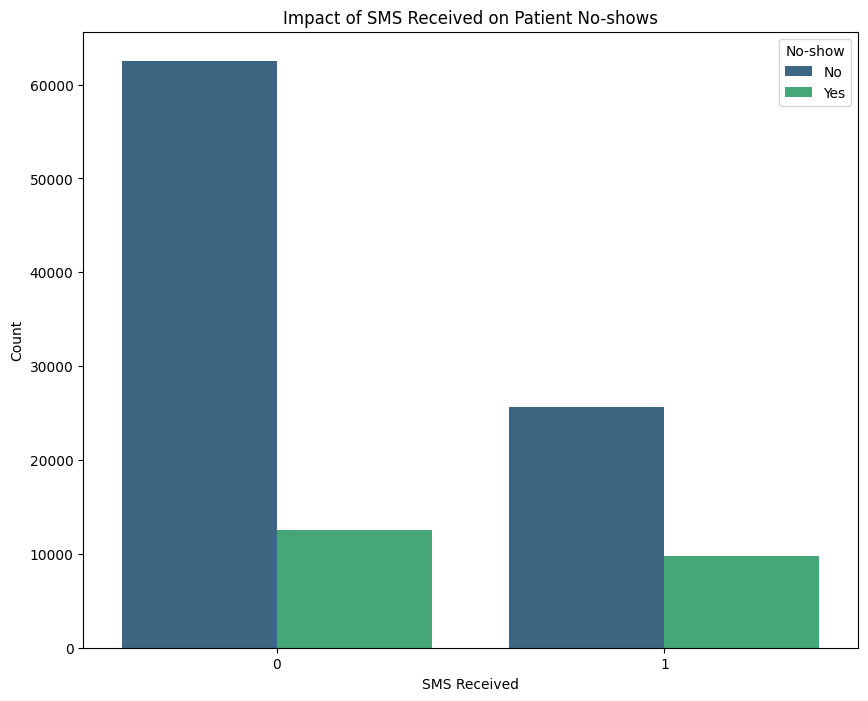

In [82]:
# Create a count plot to show the relationship between SMS_received and No-shows
plt.figure(figsize=(10, 8))
sns.countplot(x='SMS_received', hue='No-show', data=appoint, palette='viridis')
plt.title('Impact of SMS Received on Patient No-shows')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(title='No-show', loc='upper right')
plt.show()


In [76]:

# Calculate the Show rate for those who received SMS and those who did not
Show_Rate = appoint.groupby('SMS_received')['Show'].mean().reset_index()
Show_Rate .rename(columns={'Show': 'Show_Rate '}, inplace=True)
Show_Rate ['SMS_received'] = Show_Rate ['SMS_received'].map({0: 'No', 1: 'Yes'})

# Display the no-show rates for each category
Show_Rate 

,SMS_received,Show_Rate
0,No,0.832965
1,Yes,0.724255


The count plot visualizes the number of patients who did and did not show up to their appointments, split by whether or not they received an SMS. From the plot, it's evident that among the patients who did not receive an SMS, a larger proportion showed up to their appointments compared to those who did receive an SMS.

The `Show_Rate ` calculated for each group reinforce this:

Patients who did not receive an SMS had a show rate of approximately 83.2%.
Patients who did receive an SMS had a lower show rate of approximately 72.4%.

This finding suggests a need for further investigation into the context of how SMS reminders are used and whether other factors might influence the relationship between SMS reminders and appointment attendance. ​

The bar plots reveal the percentage of patients who showed up for their appointments across these different categories. 

Receiving SMS reminders seems having stronger impact than other factors. However, the higher percentage is in the group that did not receive messages.

* Any influential numerical vairable?

<Axes: title={'center': 'Age'}, xlabel='No-show'>

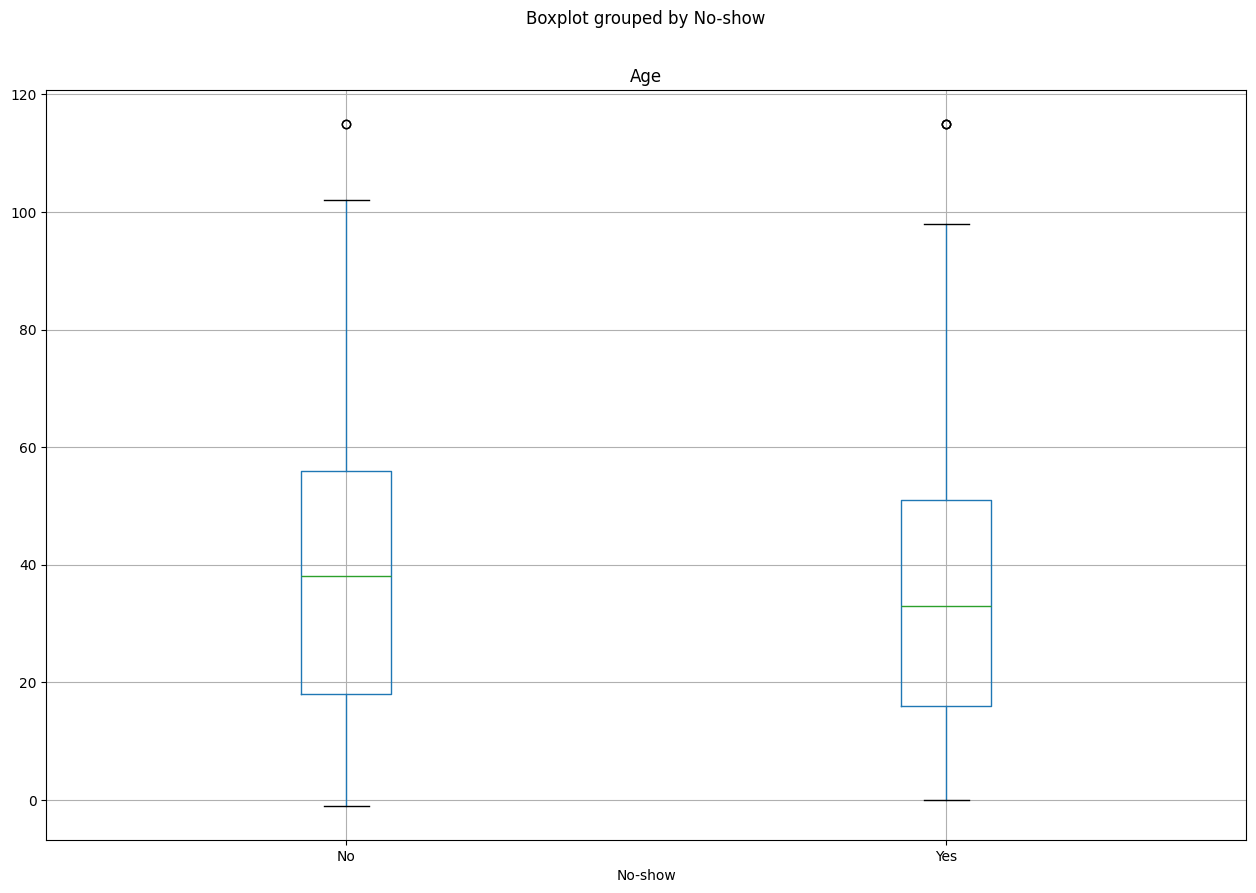

In [ ]:
#plot the distribution of Age across No-show
df.boxplot(column='Age', by='No-show', figsize=(15, 10))

The spread of Age across show or non show group is not very different. Let's check the histgram and line plot. 

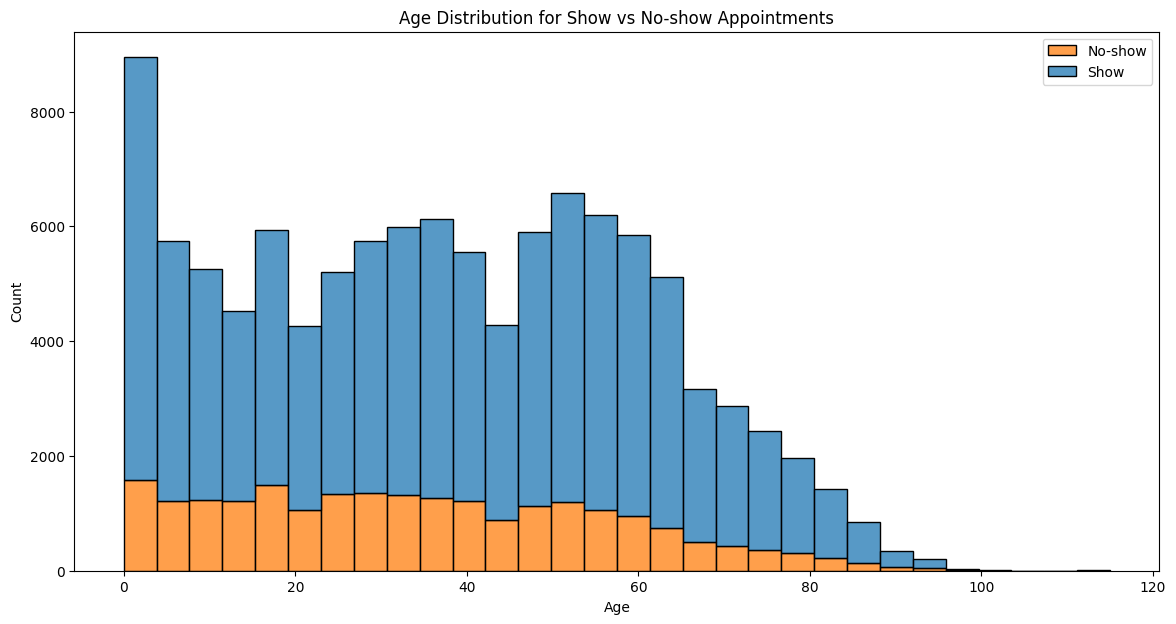

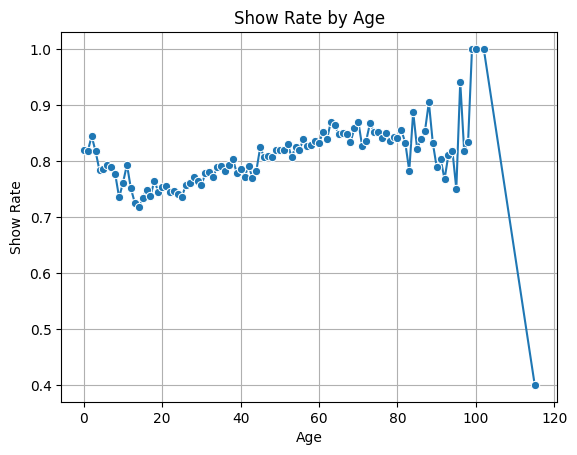

In [94]:
# Create a histogram for age distribution of show vs no-show
plt.figure(figsize=(14, 7))
sns.histplot(data=appoint, x="Age", hue="No-show", multiple="stack", bins=30, kde=False)
plt.title('Age Distribution for Show vs No-show Appointments')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['No-show','Show'])
plt.show()

# Create a line plot to show the trend of how rate 
#function to plot percentage of show up
def plot_percentage(data, x_col, y_col):
    # Group by x_col to calculate show rates for each age
    show_rate = appoint.groupby(x_col)[y_col].mean().reset_index()
 
    # Create the line plot with 'showpct' calculated directly
    sns.lineplot(data=show_rate, x=x_col, y=y_col, marker="o") 
    plt.title('Show Rate by Age')
    plt.xlabel(x_col)
    plt.ylabel('Show Rate')
    plt.grid(True)
    
plot_percentage(appoint, 'Age', 'Show')


The visuals provide two perspectives on how age impacts whether patients miss their appointment:

Age Distribution Histogram: The stacked histogram shows the count of patients who showed up for their appointments versus those who did not, distributed across different age groups. We can observe that no-shows tend to be slightly more frequent in the younger age groups and then decline as age increases, with fewer no-shows in older age groups.

Show Rate by Age Line Plot: The line plot depicts the trend of the show rate across different ages. There's a clear trend that the show rate is lower among the younger population, increases as age increases, particularly through childhood and young adulthood, and then stabilizes in the middle age range. After a certain age, there appears to be a slight downtick in the show rate among the oldest patients, which could be due to various factors such as increased health issues, transportation difficulties, or other age-related challenges.

Together, these visuals suggest that age is a factor in patient appointment attendance, with younger patients and the very elderly being more likely to miss appointments compared to other age groups. ​

* The line peaks at certain points suggests that showing at an appointment is more prevalent in these age ranges.

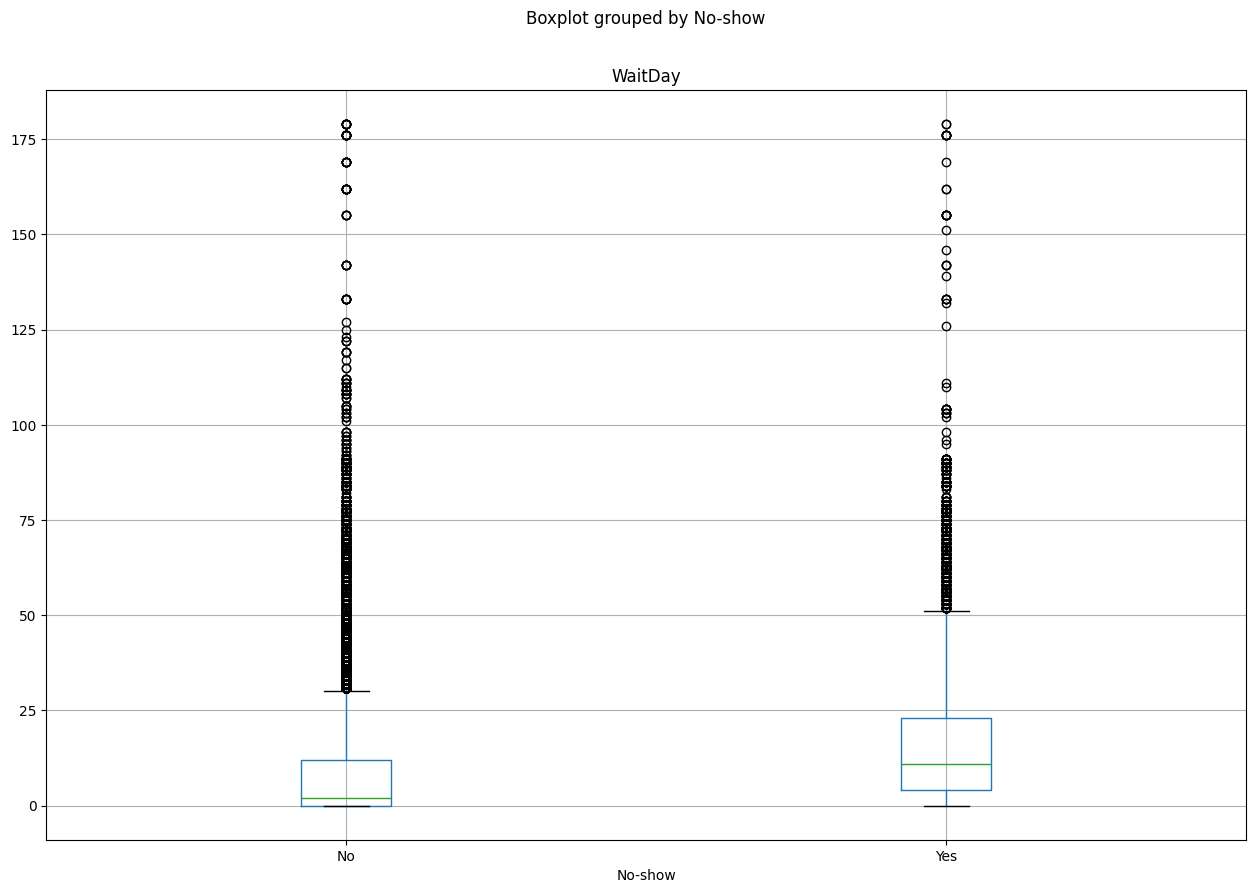

In [ ]:
# Check distribution of Waiting time across No-show
appoint.boxplot(column='WaitDay', by='No-show', figsize=(15, 10))
plt.show()

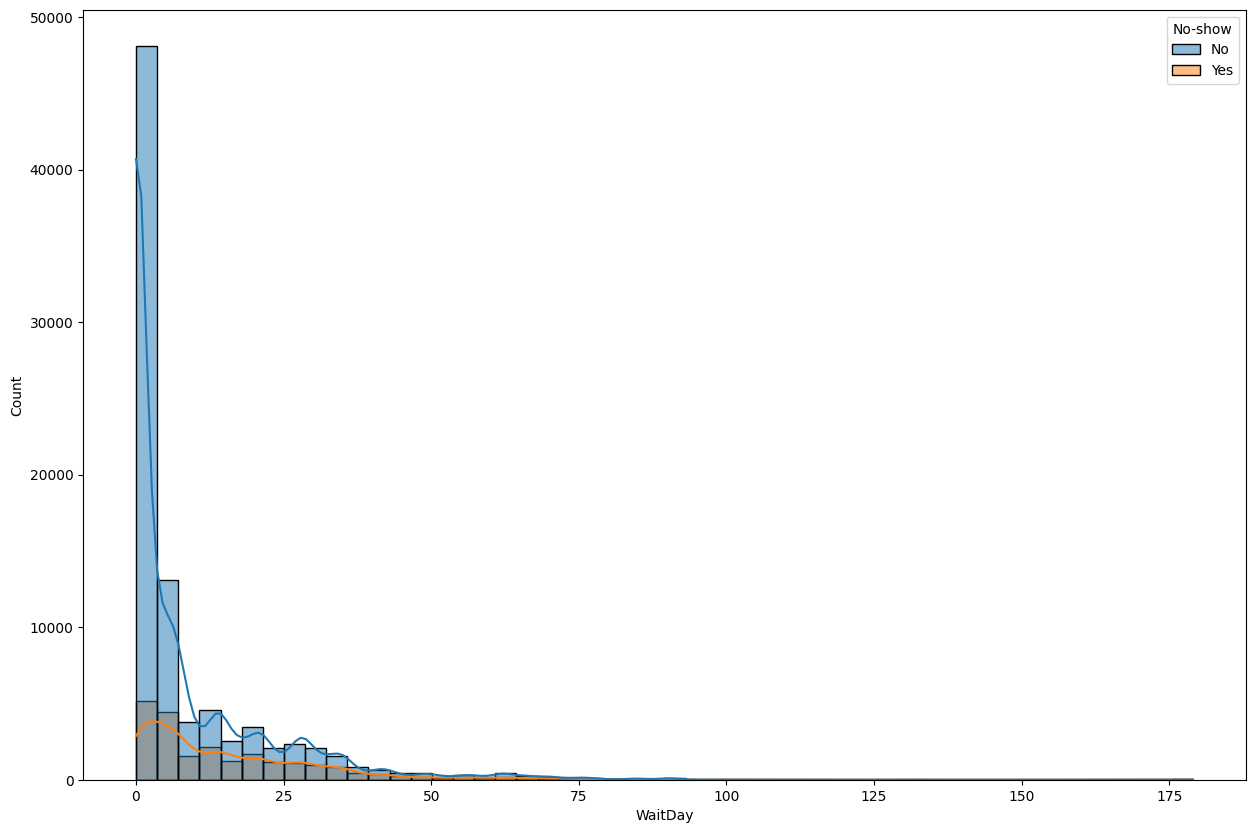

In [ ]:
#plot the distribution of Waiting time across No-show
plt.figure(figsize=(15, 10))
sns.histplot(data=appoint, x="WaitDay", hue="No-show", kde=True, bins=50);

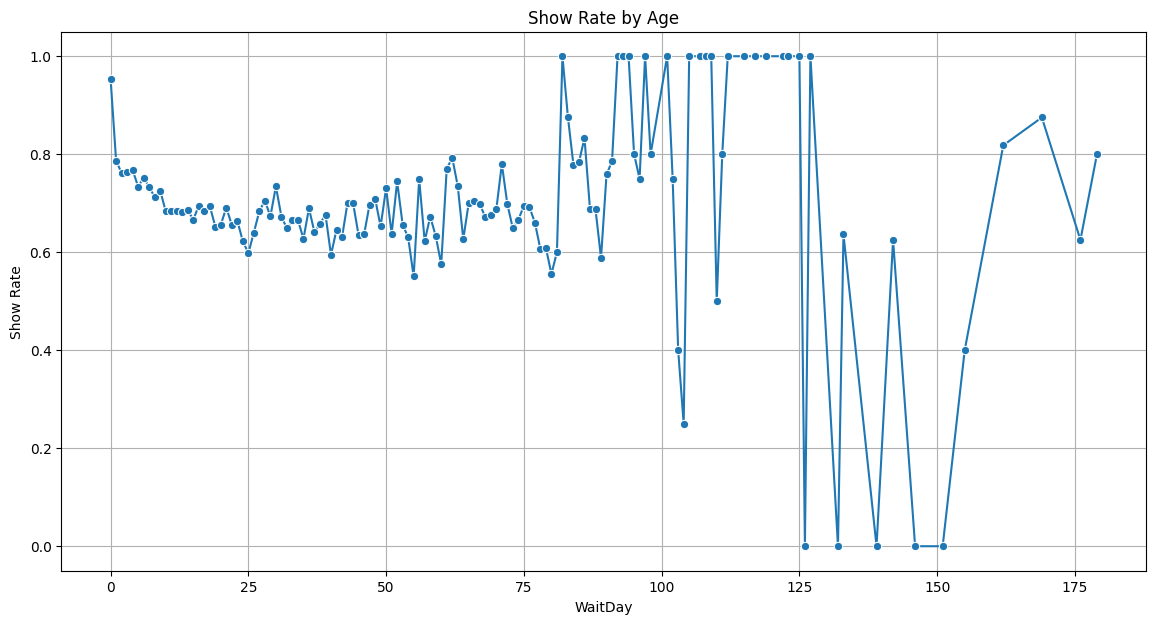

In [87]:
# plot the percentage of show up along the waiting time
plot_percentage(appoint, 'WaitDay', 'Show')


<a id='conclusions'></a>
## Conclusions

First, we explored the impact of receiving SMS reminders, having a scholarship, and having hypertension or diabetes on patient attendance at appointments. 

The bar plots (Fig 1) reveal the percentage of patients who showed up for their appointments across these different categories. From this chat, we can see receiving SMS reminders has stronger impact than other factors. Although the higher percentage in the group that did not receive messages is unexpected. Additional research can be done here to explore more deeply in the future. 



/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_2906/450119696.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_2906/450119696.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_2906/450119696.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])
/var/folders/t0/5jrwg52n4fs5kw38f2vnrkzw0000gn/T/ipykernel_2906/450119696.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No', 'Yes'])


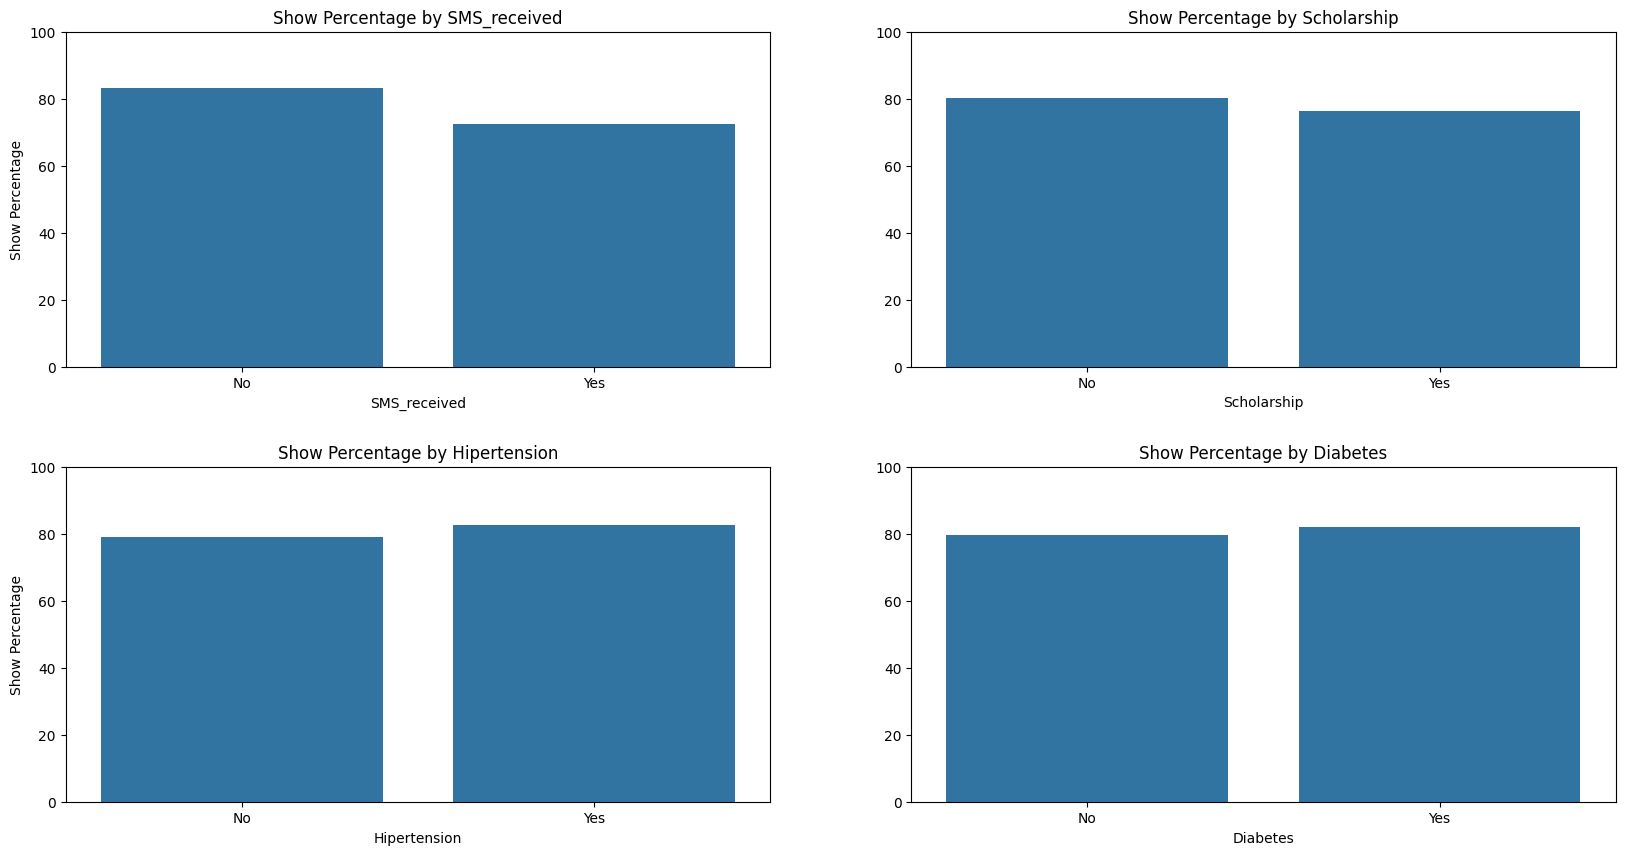

In [ ]:
plot_variables(appoint, ['SMS_received', 'Scholarship', 'Hipertension', 'Diabetes'], 'Show')

After look more closer into SMS_received variable. SMS reminders may not be as effective as anticipated as shown in fig 2.

Ptients who did not receive an SMS had a show rate of approximately 83.2%.
Patients who did receive an SMS had a lower show rate of approximately 72.4%.

This finding suggests a need for further investigation into the context of how SMS reminders are used and whether other factors might influence the relationship between SMS reminders and appointment attendance. ​


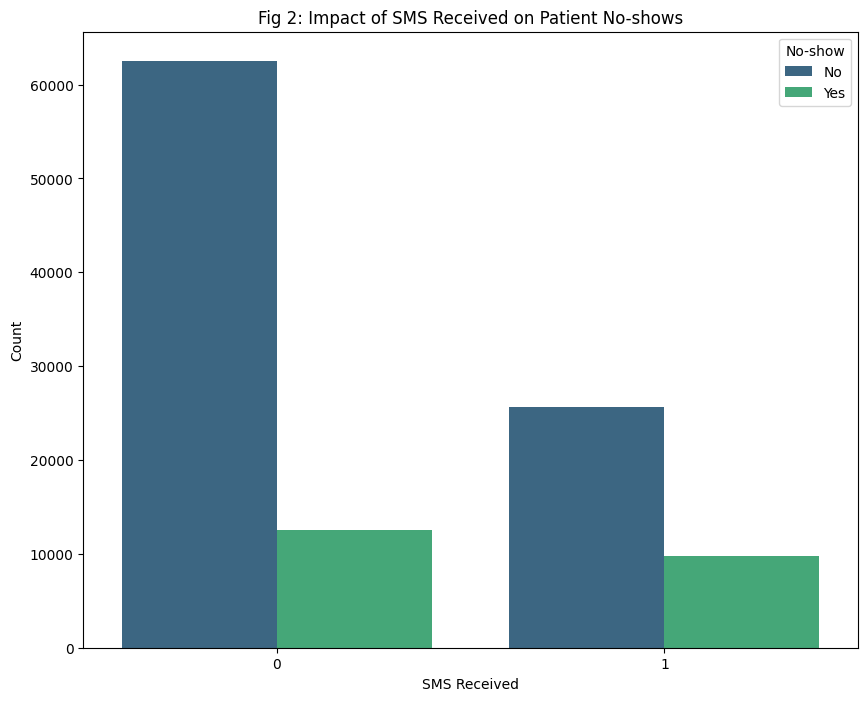

In [89]:
# Create a count plot to show the relationship between SMS_received and No-shows
plt.figure(figsize=(10, 8))
sns.countplot(x='SMS_received', hue='No-show', data=appoint, palette='viridis')
plt.title('Fig 2: Impact of SMS Received on Patient No-shows')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(title='No-show', loc='upper right')
plt.show()

Then we explored the impact of age and waiting time on patient attendance. The visualizations reveal that both age and waiting time influence whether a patient shows up for their appointment. (Fig 3)

Specifically, the likelihood of a patient showing up for their appointment tends to vary across different age groups, suggesting that age is a crucial factor in patient adherence to appointments.  

Similarly, the length of waiting time also appears to affect patient attendance, with certain waiting periods associated with higher show-up rates.   

These findings underscore the importance of considering patient demographics and appointment scheduling practices in efforts to improve patient attendance and overall healthcare service delivery.

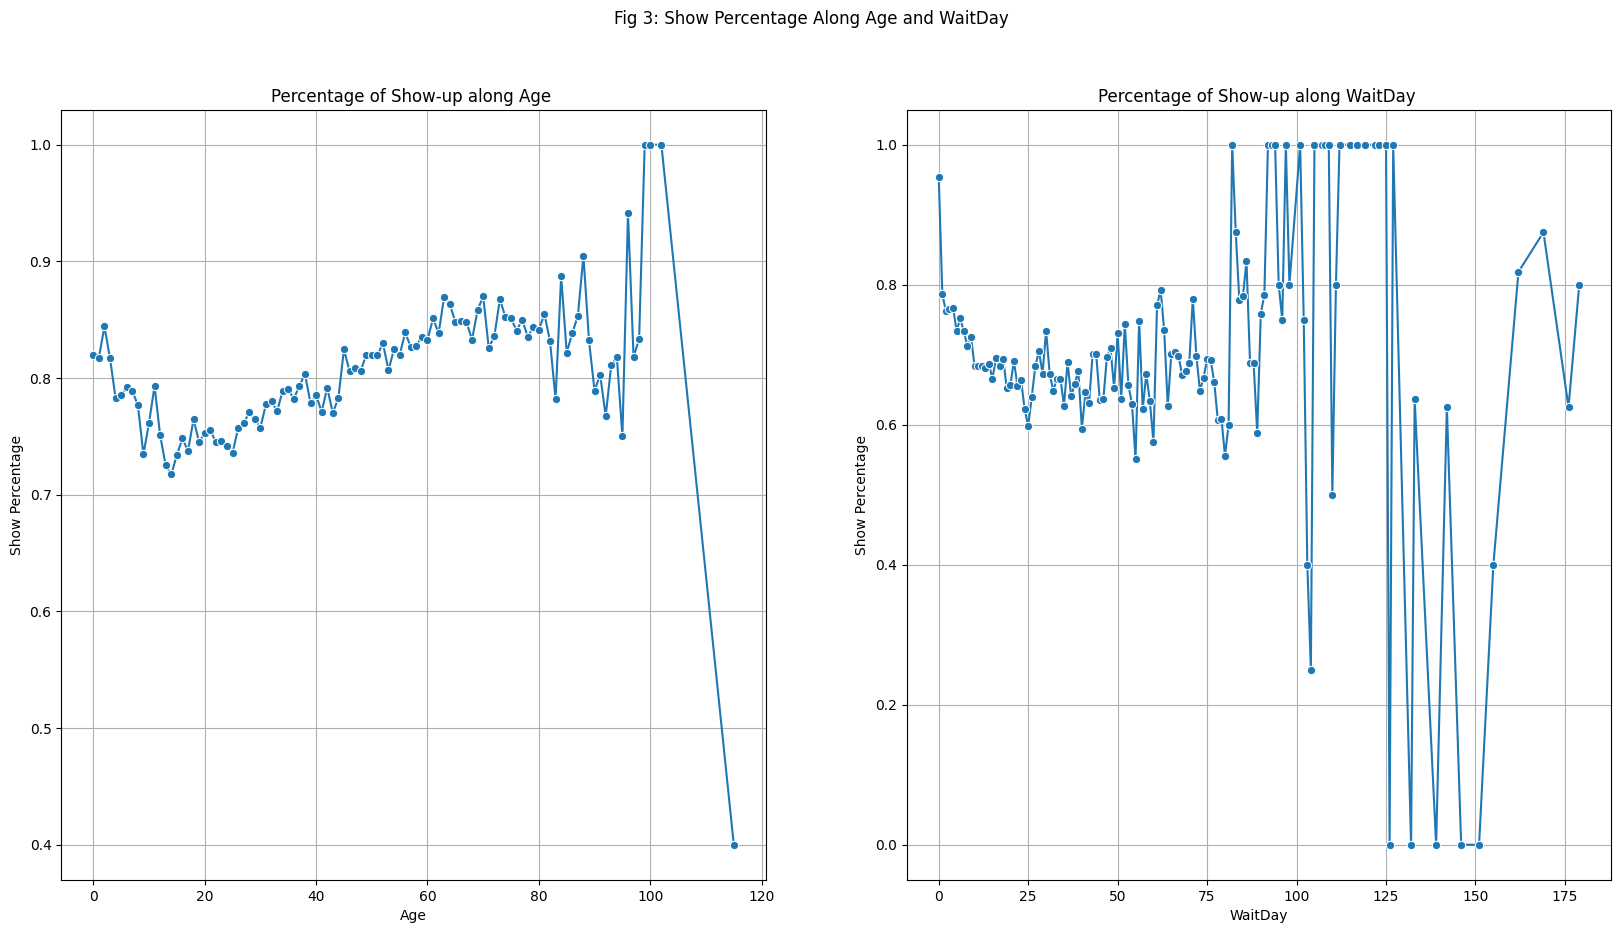

In [96]:
# List of variables to plot
variables = ['Age', 'WaitDay']


# Create a 1x2 grid of subplots
fig = plt.figure(figsize=(20, 10))

# Loop over each variable and each subplot
for i, var in enumerate(variables):
    plt.subplot(1, 2, i+1)
    # Create a cross-tabulation of the variable and 'Show'
    plot_percentage(appoint, var, 'Show')
    # Set the title, labels, and y-limit
    plt.title(f'Percentage of Show-up along {var} ')
    plt.xlabel(var)
    plt.ylabel('Show Percentage')

# Set the main title 
fig.suptitle('Fig 3: Show Percentage Along Age and WaitDay')

plt.show()


These factors' varying influences on patient adherence to appointments offers valuable insights for healthcare providers seeking to improve patient attendance rates.

While this exploration provides factors' varying influences on patient adherence to appointments, it has several limitations. First, the data does not account for potential confounding factors that could influence the observed relationships, such as transportation access, or the severity of the patient's condition. Second, the exploration is based on observational data, which limits our ability to infer causality from the observed associations. Lastly, the analysis does not consider temporal factors, such as the time of day or day of the week of the appointment, which could also impact patient attendance. We'll explore these temporal factors in the future too. 

In [ ]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python3 -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 1272568 bytes to Investigate_a_Dataset.html
